<a href="https://colab.research.google.com/github/saisiddarthakonduru/Alcohol-Detection-With-Ignition-Lock-System/blob/main/Underwater_Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib scikit-image opencv-python


In [ ]:
import os

# Create main data folder
os.makedirs('/content/data/input', exist_ok=True)
os.makedirs('/content/data/target', exist_ok=True)

print("Folders created successfully ✅")


Folders created successfully ✅


In [ ]:
import os
from glob import glob

# Get the list of image paths
# Call glob() directly, not glob.glob()
input_images = sorted(glob('/content/data/input/*.png'))
target_images = sorted(glob('/content/data/target/*.png'))

print(f"Total images found: {len(input_images)}")

Total images found: 5


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

IMG_HEIGHT, IMG_WIDTH = 256, 256

def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0  # normalize
    return img

def data_generator(input_list, target_list):
    for x, y in zip(input_list, target_list):
        yield load_image(x), load_image(y)

# Create dataset
train_ds = tf.data.Dataset.from_generator(
    lambda: data_generator(input_images, target_images),
    output_types=(tf.float32, tf.float32),
    output_shapes=([IMG_HEIGHT, IMG_WIDTH, 3], [IMG_HEIGHT, IMG_WIDTH, 3])
).batch(2)


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [ ]:
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)

    # Decoder
    u1 = layers.UpSampling2D()(c3)
    u1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(128, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(64, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(3, 1, activation='sigmoid')(c5)

    model = models.Model(inputs, outputs)
    return model

model = unet_model()
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 256, 256,  │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_22[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_24[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_26[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 128, 128,  │          0 │ conv2d_27[0][0]   │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 128, 128,  │          0 │ up_sampling2d_4[… │
│ (Concatenate)       │ 384)              │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │    442,496 │ concatenate_4[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_28[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_5     │ (None, 256, 256,  │          0 │ conv2d_29[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 256, 256,  │          0 │ up_sampling2d_5[… │
│ (Concatenate)       │ 192)              │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 256, 256,  │    110,656 │ concatenate_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_30[0][0] 

 Total params: 1,883,267 (7.18 MB)

 Trainable params: 1,883,267 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(train_ds, epochs=100)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.1166 - mae: 0.1166
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.1044 - mae: 0.1044
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - loss: 0.1035 - mae: 0.1035
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - loss: 0.0984 - mae: 0.0984
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - loss: 0.1387 - mae: 0.1387
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.1553 - mae: 0.1553
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - loss: 0.1427 - mae: 0.1427
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - loss: 0.1064 - mae: 0.1064
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.1203 - mae: 0.1203
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.0975 - mae: 0.0975
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - loss: 0.1113 - mae: 0.1113
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - loss: 0.1019 - mae: 0.1019
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - loss: 0.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


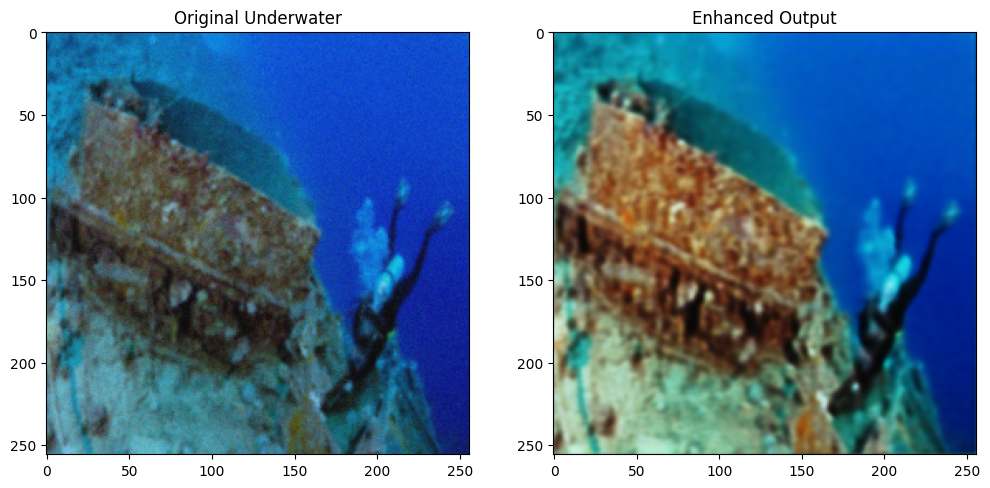

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # Import numpy for clipping

# Pick a test image
test_img_path = input_images[0]
img = load_image(test_img_path)
pred = model.predict(tf.expand_dims(img, axis=0))[0]

# --- FIX: Normalize the prediction for display ---
# Clip the values to be between 0 and 1, in case the model
# predicts slightly outside this range.
pred = np.clip(pred, 0, 1)

# Create the plot
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Underwater")
plt.imshow(img)

# Enhanced Output
plt.subplot(1, 2, 2)
plt.title("Enhanced Output")
plt.imshow(pred) # Now displaying the normalized image

plt.show()

Please choose an image file to upload:


Saving 9_img_.png to 9_img_ (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


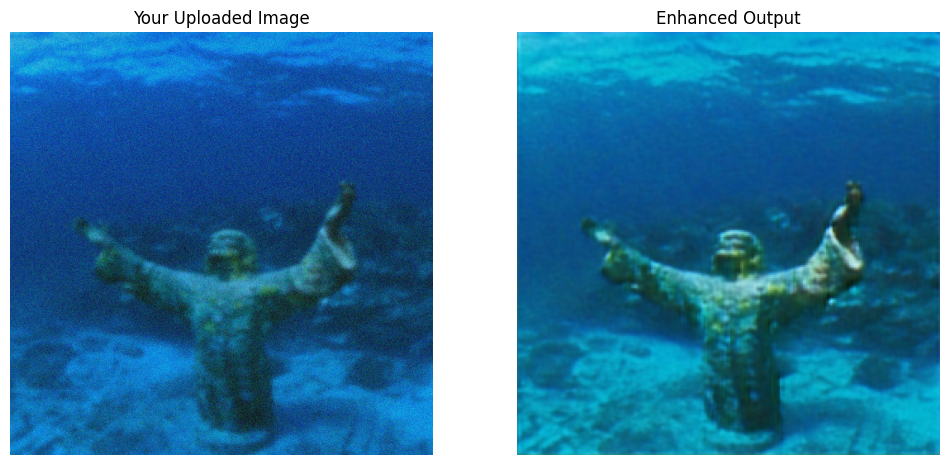

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files

# ===================================================================
#  Re-use the same image loading function from training
# ===================================================================
IMG_HEIGHT, IMG_WIDTH = 256, 256

def load_and_preprocess_image(path):
    """Loads and preprocesses an image for model prediction."""
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img_normalized = img_resized / 255.0  # normalize to [0, 1]
    return img_normalized, img # Return original for display

# ===================================================================
#  Upload, Predict, and Display
# ===================================================================

# 1. Prompt user to upload an image file
print("Please choose an image file to upload:")
uploaded = files.upload()

# Check if a file was uploaded
if not uploaded:
    print("\nNo file was uploaded. Please run the cell again.")
else:
    # 2. Get the path of the uploaded file
    # (We assume only one file is uploaded)
    test_img_path = list(uploaded.keys())[0]

    # 3. Load and preprocess the image
    # We keep the original image to display it
    processed_img, original_img = load_and_preprocess_image(test_img_path)

    # 4. Use the trained model to make a prediction
    # The model expects a "batch" of images, so we add a dimension
    pred = model.predict(tf.expand_dims(processed_img, axis=0))[0]

    # Clip values to be in the [0, 1] range for safe plotting
    pred = np.clip(pred, 0, 1)

    # 5. Display the original and the enhanced output
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    # Display the original image (before resizing) for a true comparison
    plt.imshow(cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB))
    plt.title("Your Uploaded Image")
    plt.axis('off') # Hide axes for a cleaner look

    plt.subplot(1, 2, 2)
    plt.imshow(pred)
    plt.title("Enhanced Output")
    plt.axis('off') # Hide axes for a cleaner look

    plt.show()

In [ ]:
# ===================================================================
# Step 1: Import necessary layers and the VGG19 model
# ===================================================================
from tensorflow.keras.applications import VGG19
from tensorflow.keras import Model
import tensorflow.keras.backend as K

# ===================================================================
# Step 2: Define the Perceptual Loss Function
# ===================================================================

def build_vgg():
    """
    Builds a VGG19 model that outputs the feature maps from a specific layer.
    """
    vgg = VGG19(weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    vgg.trainable = False
    # Use the output of a block that has learned rich features
    # 'block5_conv4' is a common choice
    return Model(inputs=vgg.input, outputs=vgg.get_layer("block5_conv4").output)

# Instantiate the VGG model
vgg = build_vgg()

def perceptual_loss(y_true, y_pred):
    """
    Calculates the perceptual loss between the true and predicted images.
    """
    # VGG19 was trained on images with pixel values in [0, 255]
    y_true_vgg = vgg(y_true * 255.0)
    y_pred_vgg = vgg(y_pred * 255.0)

    # Calculate the Mean Squared Error of the feature maps
    return K.mean(K.square(y_true_vgg - y_pred_vgg))

def combined_loss(y_true, y_pred):
    """
    Combines a standard pixel loss (MAE) with the perceptual loss.
    """
    # You can adjust the weight of the perceptual loss. 1.0 is a good start.
    mae_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    p_loss = perceptual_loss(y_true, y_pred)

    # Adjust the weight (alpha) to balance the two losses
    alpha = 0.5
    return mae_loss + alpha * p_loss

# ===================================================================
# Step 3: Compile and Train the Model with the new Combined Loss
# ===================================================================
# Re-create your U-Net model if needed
# model = unet_model()

# --- COMPILE WITH THE NEW LOSS FUNCTION ---
model.compile(optimizer='adam', loss=combined_loss, metrics=['mae'])

print("Model compiled with Combined (MAE + Perceptual) Loss.")
model.summary()

# --- TRAIN THE MODEL ---
# You may not need as many epochs now, start with 30-50 and see
print("\nStarting model training with new loss...")
history = model.fit(train_ds, epochs=50)
print("Training complete! ✅")

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Model compiled with Combined (MAE + Perceptual) Loss.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 256, 256,  │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_22[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_24[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_26[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 128, 128,  │          0 │ conv2d_27[0][0]   │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 128, 128,  │          0 │ up_sampling2d_4[… │
│ (Concatenate)       │ 384)              │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │    442,496 │ concatenate_4[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_28[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_5     │ (None, 256, 256,  │          0 │ conv2d_29[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 256, 256,  │          0 │ up_sampling2d_5[… │
│ (Concatenate)       │ 192)              │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 256, 256,  │    110,656 │ concatenate_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_30[0][0] 

 Total params: 1,883,267 (7.18 MB)

 Trainable params: 1,883,267 (7.18 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training with new loss...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 12s/step - loss: 16.1527 - mae: 0.0622
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 12s/step - loss: 14.4598 - mae: 0.0604
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - loss: 13.4332 - mae: 0.0505
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 12s/step - loss: 12.3664 - mae: 0.0502
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 13s/step - loss: 11.7458 - mae: 0.0530
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 14s/step - loss: 11.0139 - mae: 0.0512
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 13s/step - loss: 10.5494 - mae: 0.0498
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - loss: 10.6229 - mae: 0.0527
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - loss: 9.6673 - mae: 0.0513
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 13s/step - loss: 9.3404 - mae: 0.0477
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 13s/step - loss: 9.1326 - mae: 0.0517
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - loss: 8.6234 - mae: 0.0513
Epoch 13/50